 <h1 style="color: #f28b25; text-align: center;">🌍 Sentiment_Climate Insights ML</h1>

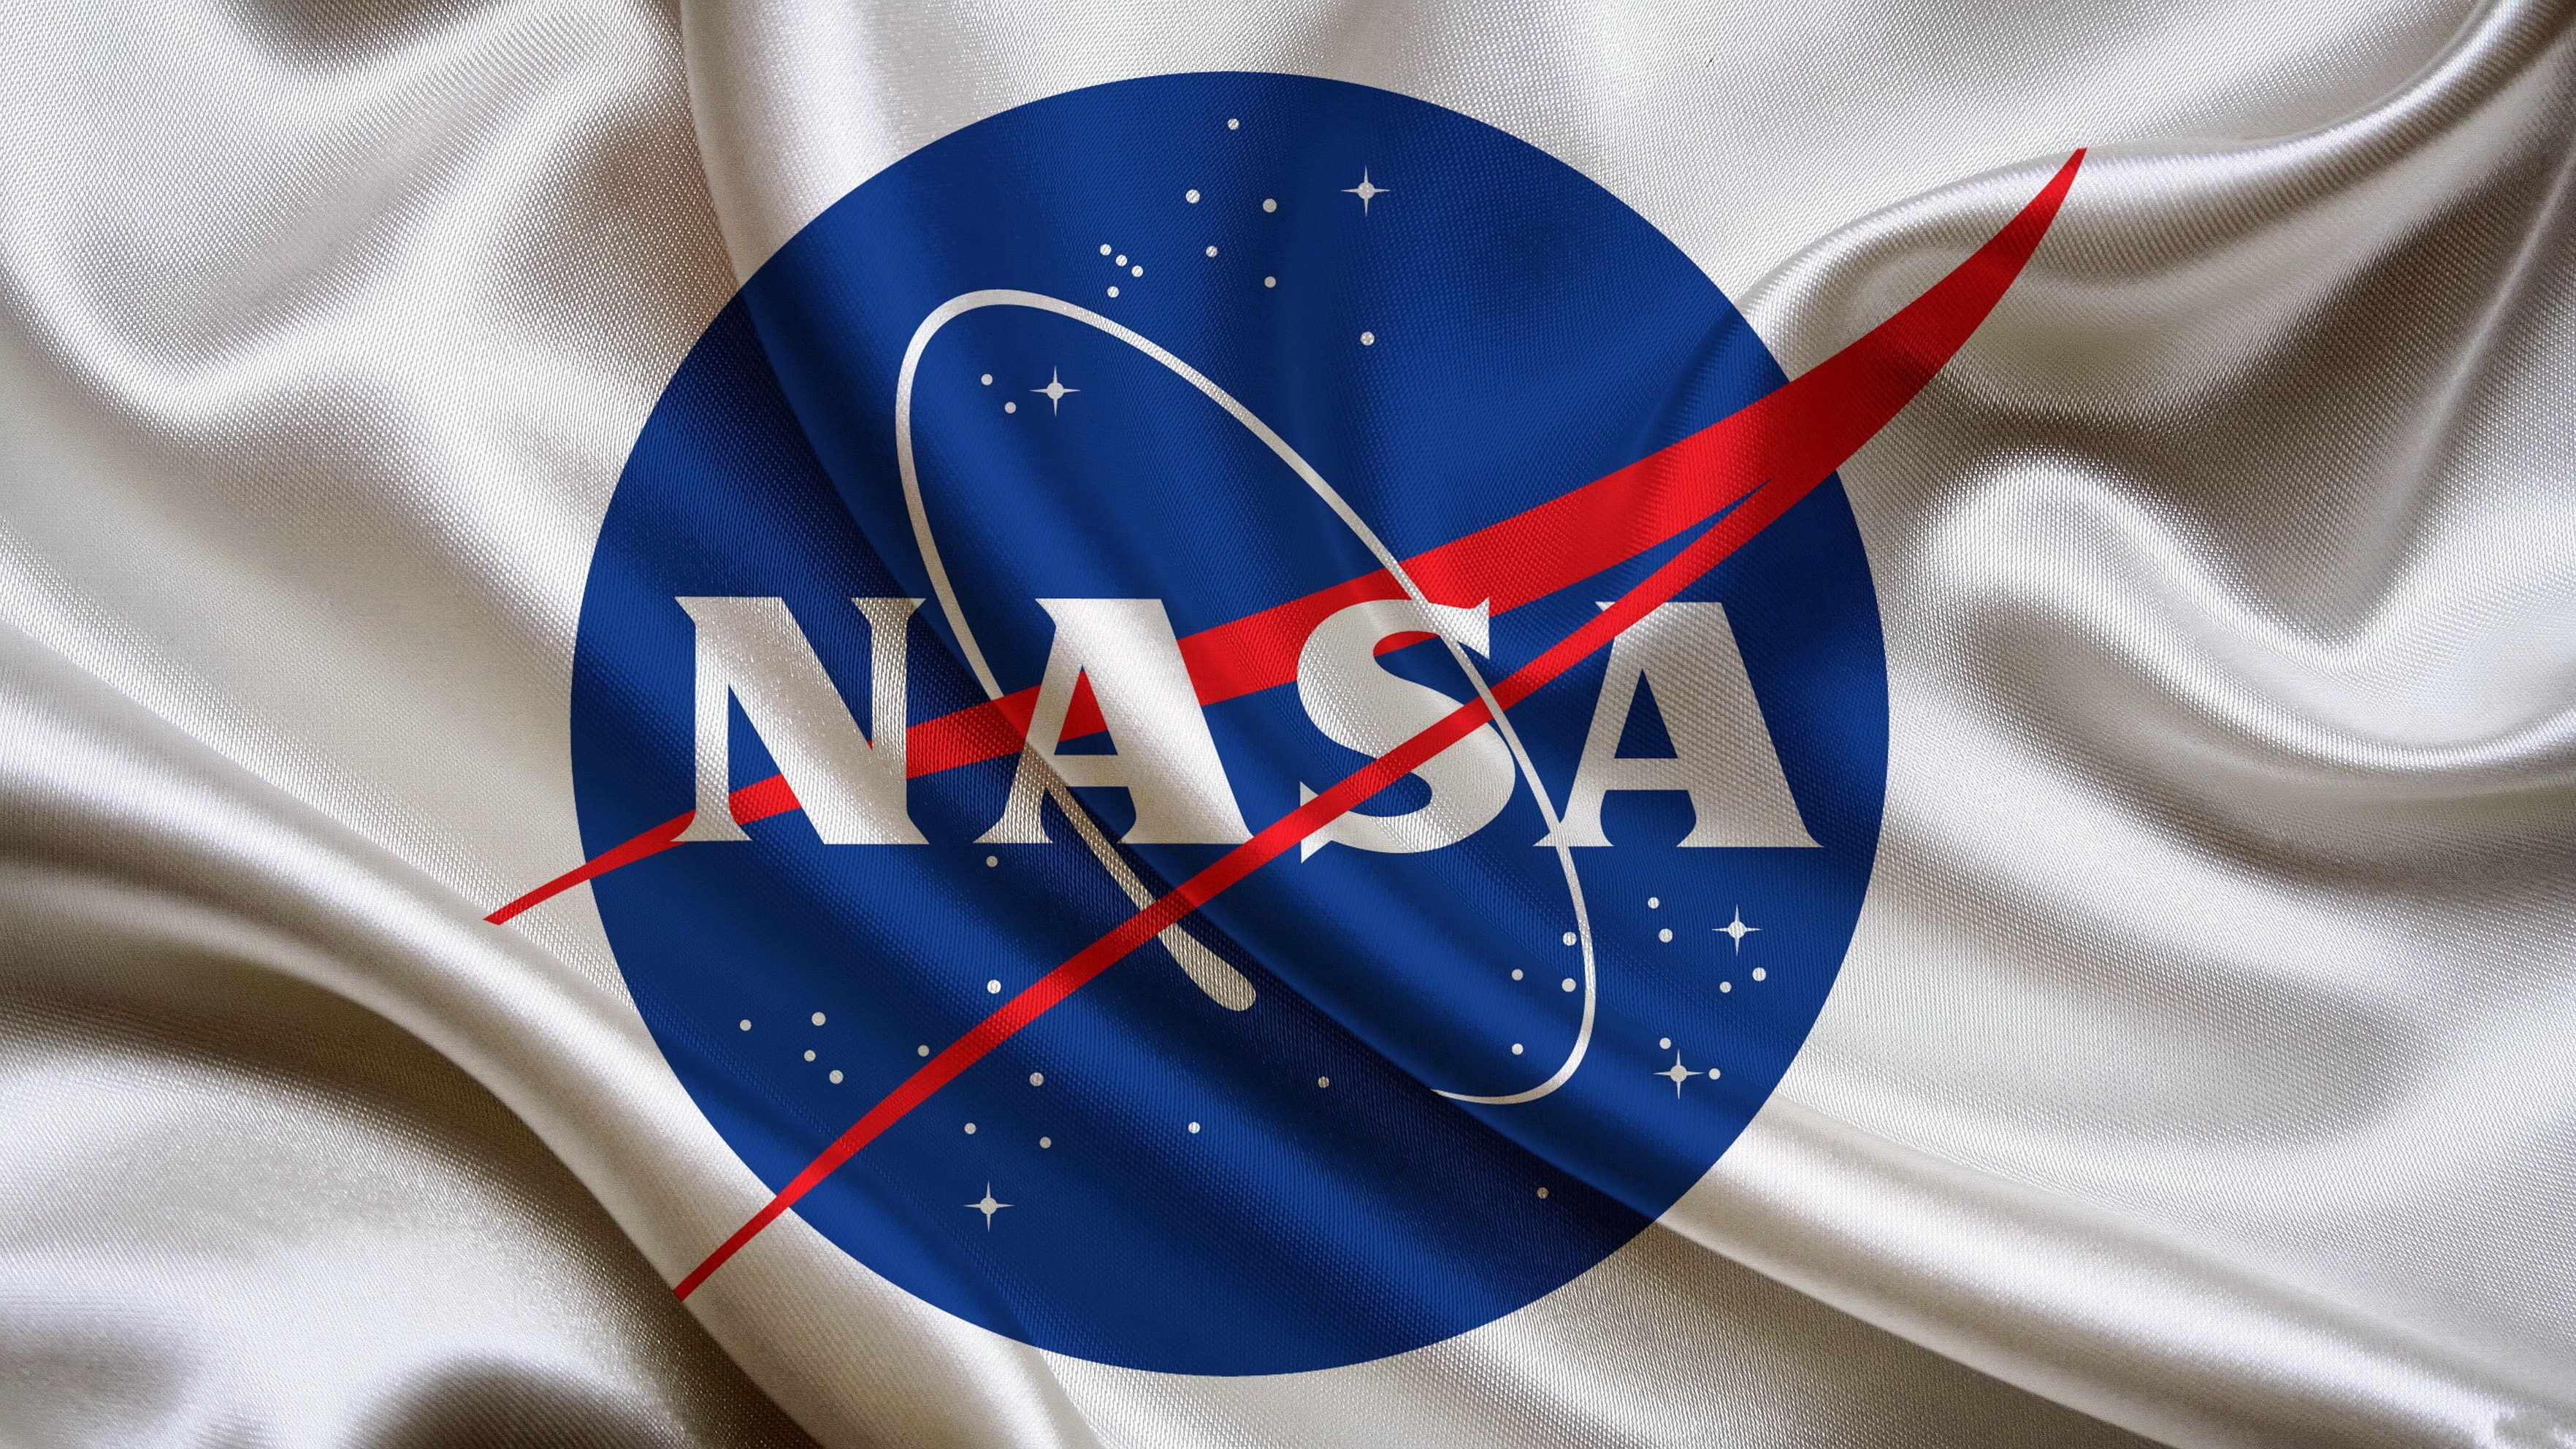

 <h2 style="color: #569cd6;">🚀 Features</h2>
  <ul style="list-style-type: square; color: #8C1CC4;">
    <li>Sentiment analysis of climate-related texts (positive, neutral, negative).</li>
    <li>Utilizes cutting-edge NLP models.</li>
    <li>Data visualization for sentiment distribution and trends over time.</li>
    <li>Pre-trained and fine-tuned models for accuracy.</li>
  </ul>

In [141]:
 import pandas as pd
 import numpy as np
import plotly.express as px
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import StandardScaler
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
 import matplotlib.pyplot as plt
 import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.feature_extraction.text import TfidfVectorizer





In [143]:
!pip install scikit-learn


In [145]:
data = pd.read_csv('climate_nasa.csv')

# Display the first few rows and describing 

In [148]:

print(data.head()) 
print(data.describe())

                       date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...  
3  excellent post! I defo feel the difference - o...  
4  Yes, and carbon dioxide does not har

In [150]:


print("Dataset Preview:")
display(data.head())



Dataset Preview:


,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


 # Calculate the length of each comment (number of characters or words) and categorize them as "big" or "small."

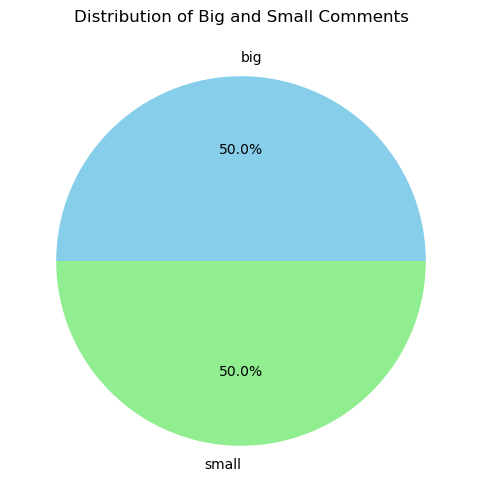

In [242]:


# Calculate the length of each text comment
data['text_length'] = data['text'].astype(str).apply(len)

# Define thresholds for 'big' and 'small'
threshold = data['text_length'].median()  # Median as the threshold
data['size'] = data['text_length'].apply(lambda x: 'big' if x > threshold else 'small')


size_counts = data['size'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Big and Small Comments')
plt.show()



# Check for null values

In [245]:

print("\nNull Value Summary:")
print(data.isnull().sum())


Null Value Summary:
date               0
likesCount         0
profileName        0
commentsCount    278
text              18
text_length        0
size               0
dtype: int64


In [247]:

print("\nDataset Statistics:")
print(data.describe())



Dataset Statistics:
       likesCount  commentsCount  text_length
count  522.000000     244.000000   522.000000
mean     4.720307       8.696721   179.141762
std     12.053556      12.266176   519.944862
min      0.000000       1.000000     1.000000
25%      0.000000       2.000000    37.000000
50%      1.000000       5.000000    88.500000
75%      4.000000      10.000000   176.000000
max    126.000000      93.000000  7649.000000


# Plot the statistics

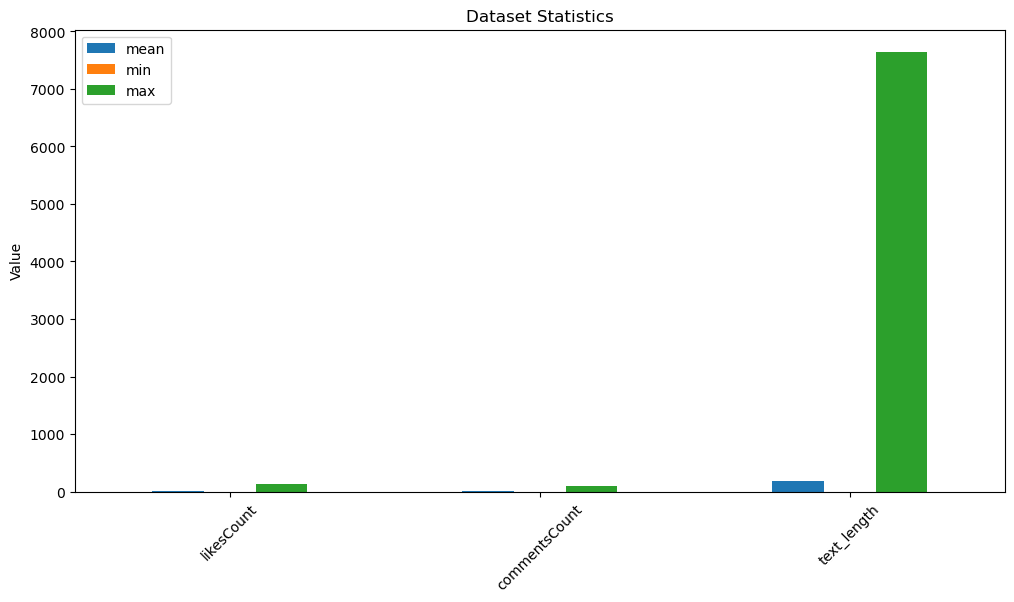

In [250]:
stats = data.describe().transpose()


stats_to_plot = stats[['mean', 'min', 'max']]


stats_to_plot.plot(kind='bar', figsize=(12, 6))
plt.title('Dataset Statistics')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

# Mean statistics per column

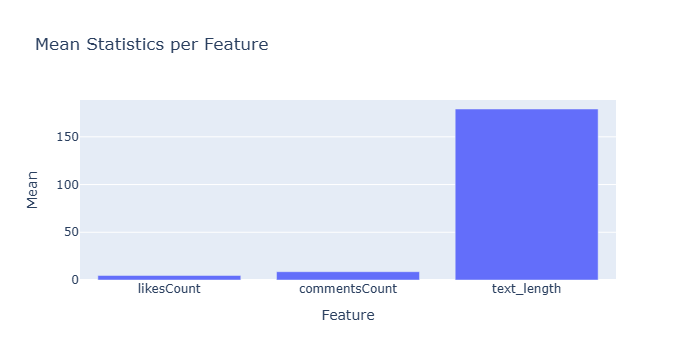

In [253]:



stats_to_plot = stats['mean'].reset_index()
stats_to_plot.columns = ['Feature', 'Mean']

fig = px.bar(stats_to_plot, x='Feature', y='Mean', title='Mean Statistics per Feature')
fig.show()


# Exploratory Data Analysis (EDA)

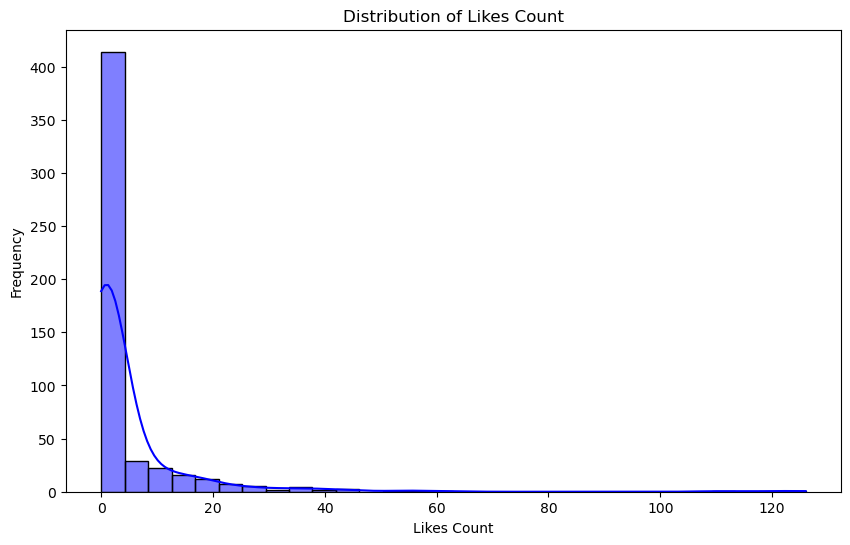

In [256]:

# distribution od like count 
plt.figure(figsize=(10, 6))
sns.histplot(data['likesCount'], bins=30, kde=True, color='blue')
plt.title("Distribution of Likes Count")
plt.xlabel("Likes Count")
plt.ylabel("Frequency")
plt.show()

In [258]:
print(data.columns)


Index(['date', 'likesCount', 'profileName', 'commentsCount', 'text',
       'text_length', 'size'],
      dtype='object')


In [260]:
!pip install wordcloud


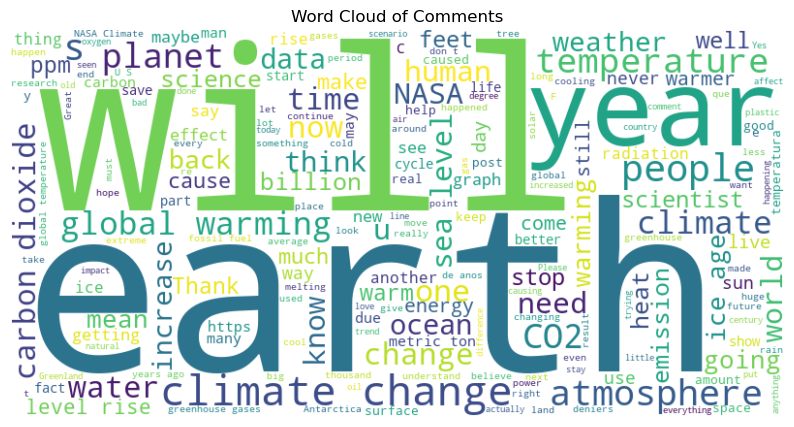

In [261]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join(str(comment) for comment in data['text'].dropna())

# I am gonna Generate  the word cloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Comments")
plt.show()


# Sentiment Labeling

## Why Sentiment Labeling?

- **Analysis of Trends:** Helps analyze the general tone or sentiment of posts over time.
- **Decision-Making:** Assists businesses, individuals, or researchers in understanding audience reactions.
- **Data Categorization:** Makes the data easier to categorize and analyze, as it provides clear labels.


object


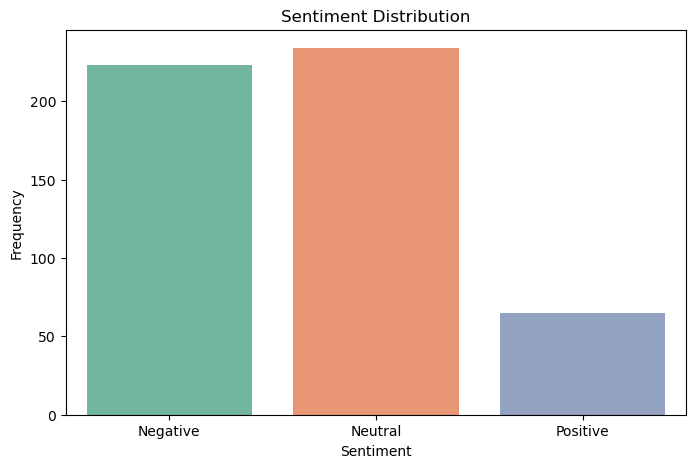

In [264]:

def label_sentiment(likes):
    if likes > 10:
        return "Positive"
    elif likes > 0:
        return "Neutral"
    else:
        return "Negative"

data['Sentiment'] = data['likesCount'].apply(label_sentiment)

print(data['Sentiment'].dtype) 

data['Sentiment'] = data['Sentiment'].astype('category')

plt.figure(figsize=(8, 5))
sns.countplot(x=data['Sentiment'], palette='Set2')  # Specify x= for countplot
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.show()


# Text Preprocessing

In [266]:
print(data['text'].isnull().sum())


18


In [267]:
data['text'] = data['text'].fillna('')


# Handling missing values in the 'Text' column

In [274]:

data['text'] = data['text'].fillna('')  


tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['text']).toarray()


In [276]:
# Check for missing values after filling

missing_before = data['text'].isna().sum()  # Count missing values before handling
data['text'] = data['text'].fillna('')     # Handle missing values
missing_after = data['text'].isna().sum()  # Count missing values after handling

In [278]:


print("Missing before handling:", missing_before)
print("Missing after handling:", missing_after)


Missing before handling: 0
Missing after handling: 0


In [280]:
missing_summary = data.isna().sum()
print("Missing values in each column:\n", missing_summary)


Missing values in each column:
 date               0
likesCount         0
profileName        0
commentsCount    278
text               0
text_length        0
size               0
Sentiment          0
dtype: int64


# TESTING Text Preprocessing

In [283]:
import re

data['text'] = data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))


In [285]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources (run once)
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

data['cleaned_text'] = data['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Text Vectorization

In [288]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['cleaned_text']).toarray()

# Check the shape of the resulting array
print("TF-IDF Matrix shape:", X.shape)


TF-IDF Matrix shape: (522, 2687)


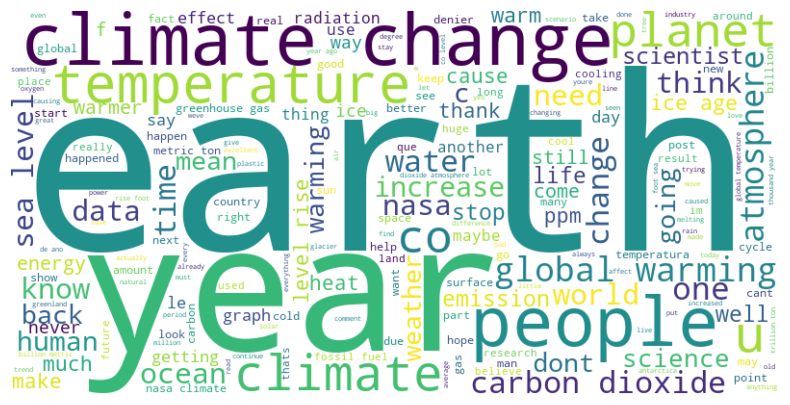

In [347]:

text = ' '.join(data['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [351]:



data['label'] = [1 if 'positive' in text else 0 for text in data['text']]  # Dummy labels


X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9904761904761905


# Encoding sentiment labels

In [354]:


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Sentiment'])

# Training-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")


Training set size: (417, 2687), Test set size: (105, 2687)


# Model Training

* gonna to show the actual vs. predicted classifications.

In [358]:
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train, y_train)

# Making predictions
y_pred = classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification report with zero_division handling
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))

Model Accuracy: 0.47

Classification Report:
              precision    recall  f1-score   support

    Negative       0.55      0.57      0.56        53
     Neutral       0.38      0.46      0.42        41
    Positive       0.00      0.00      0.00        11

    accuracy                           0.47       105
   macro avg       0.31      0.34      0.32       105
weighted avg       0.42      0.47      0.44       105



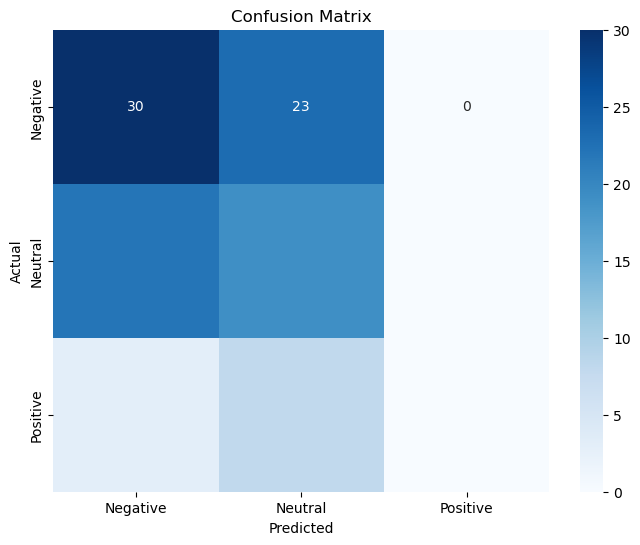

In [301]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Sentiment Trend Analysis

In [304]:
# Convert 'date' column to datetime and remove timezone if present
data['date'] = pd.to_datetime(data['date']).dt.tz_localize(None)
data['YearMonth'] = data['date'].dt.to_period('M')  # Extract Year-Month

In [306]:

trend_data = data.groupby(['YearMonth', 'Sentiment']).size().unstack(fill_value=0)
trend_data = trend_data.div(trend_data.sum(axis=1), axis=0)  # Convert counts to proportions

<Figure size 1200x600 with 0 Axes>

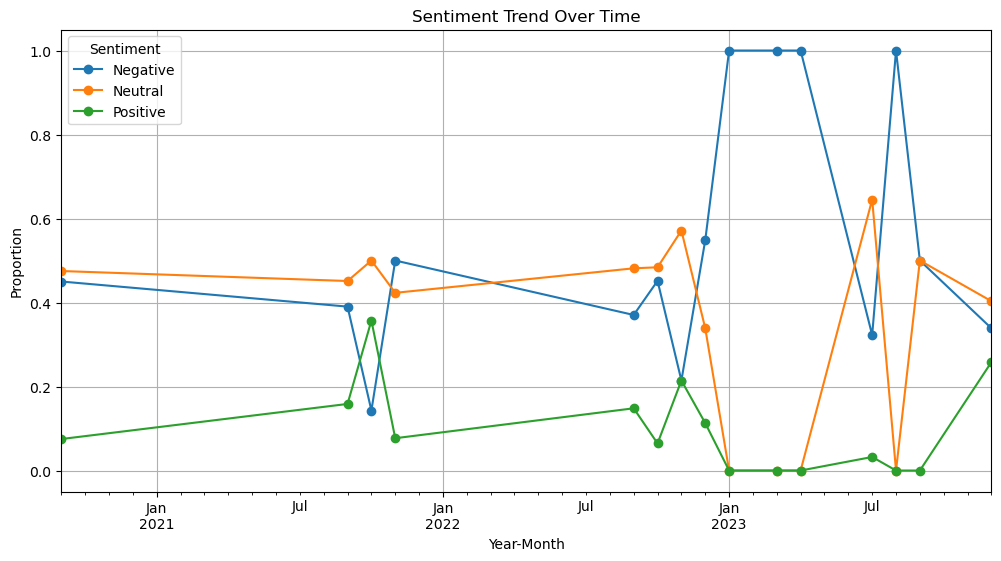

In [308]:

plt.figure(figsize=(12, 6))
trend_data.plot(kind='line', figsize=(12, 6), marker='o', title="Sentiment Trend Over Time")
plt.ylabel("Proportion")
plt.xlabel("Year-Month")
plt.grid(True)
plt.legend(title="Sentiment")
plt.show()

# Saving a the trained model

In [331]:
import joblib


joblib.dump(clf, "sentiment_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

print("Model and encoders saved successfully!")


Model and encoders saved successfully!


# End 

---

 * Deployment and Prediction new text for getting the prediction of data 

In [336]:
# Load the saved model, vectorizer, and label encoder
loaded_model = joblib.load("sentiment_model.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")
loaded_label_encoder = joblib.load("label_encoder.pkl")

# New text data for prediction
new_texts = ["I have also seen the podcast. I congratulate you both. 🎉🎉 Many many congratulations & best wishes 🎉🎉🎉🎉🎉 May God bless you both. 🎉", "Please visit barbeque nation , im sanatani ,but faiza is non vegetarian she might be having craving for non veg meal .. its perfect place to have good variety of food unlimited for 399 for veg  and 449 for non veg with great ambience and hospitality."]

# Preprocess the text 
new_texts_transformed = loaded_vectorizer.transform(new_texts)

# Predict using the loaded model
predictions = loaded_model.predict(new_texts_transformed)

# Decode the predicted labels
decoded_predictions = loaded_label_encoder.inverse_transform(predictions)
print("Predicted Sentiments:", decoded_predictions)


Predicted Sentiments: ['Negative' 'Negative']


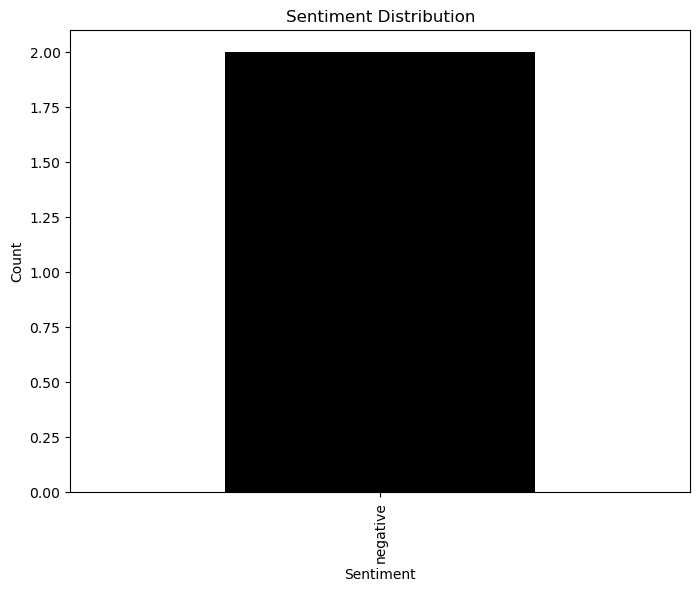

In [338]:

sentiments = ['negative', 'negative']  
sentiment_counts = pd.Series(sentiments).value_counts()


sentiment_counts.plot(kind='bar', color=['black', 'green'], figsize=(8, 6))
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [340]:
# Get probabilities for each class
probabilities = loaded_model.predict_proba(new_texts_transformed)
for i, text in enumerate(new_texts):
    print(f"Text: {text}")
    print(f"Predicted: {decoded_predictions[i]}, Probability: {probabilities[i]}")


Text: I have also seen the podcast. I congratulate you both. 🎉🎉 Many many congratulations & best wishes 🎉🎉🎉🎉🎉 May God bless you both. 🎉
Predicted: Negative, Probability: [0.98433627 0.01566373]
Text: Please visit barbeque nation , im sanatani ,but faiza is non vegetarian she might be having craving for non veg meal .. its perfect place to have good variety of food unlimited for 399 for veg  and 449 for non veg with great ambience and hospitality.
Predicted: Negative, Probability: [0.97095468 0.02904532]


# New text understanding done